In [3]:
import numpy as np
import pandas as pd
import re
import json

movies = pd.read_csv("tmdb_5000_credits.csv")
acters = movies[['cast']]
actersls = acters['cast'].tolist()

In [4]:
collections = []
oneCollection = []
for i in actersls:
    ac_json = json.loads(i)
    for j in ac_json:
        oneCollection.append(j['name'])
    collections.append(oneCollection)
    oneCollection = []

data = [['yo', 'hei']]
j = 1
relationDf = pd.DataFrame(data, columns=['title', 'acter'])
for index,i in enumerate(collections):
    df = pd.DataFrame({'acter': i})
    df['title'] = movies['title'][index]
    relationDf = relationDf.append(df)
relationDf

,acter,title
0,hei,yo
0,Sam Worthington,Avatar
1,Zoe Saldana,Avatar
2,Sigourney Weaver,Avatar
3,Stephen Lang,Avatar
4,Michelle Rodriguez,Avatar
5,Giovanni Ribisi,Avatar
6,Joel David Moore,Avatar
7,CCH Pounder,Avatar
8,Wes Studi,Avatar


In [5]:
relationDf.index = pd.RangeIndex(len(relationDf.index))
relationDf.drop(relationDf.index[0], inplace=True)
relationDf.head(10)

,acter,title
1,Sam Worthington,Avatar
2,Zoe Saldana,Avatar
3,Sigourney Weaver,Avatar
4,Stephen Lang,Avatar
5,Michelle Rodriguez,Avatar
6,Giovanni Ribisi,Avatar
7,Joel David Moore,Avatar
8,CCH Pounder,Avatar
9,Wes Studi,Avatar
10,Laz Alonso,Avatar


In [6]:
relationDf.to_csv("relationDf.csv")

In [60]:
df = pd.read_csv("relationDf.csv")

# Exemple
df.drop(['Unnamed: 0'], axis=1, inplace=True)
#df1 = df.loc[df['title']=='Avatar']
# 54201 acters
print("There are : " + str(len(df.acter.unique())) + " acters.")
# 4757 films
print("There are : " + str(len(df.title.unique())) + " films.")

# Calculate acters frequence in all films
freq = df.groupby('acter').count().sort_values(by=['title'], ascending=[False])
freq

There are : 54201 acters.
There are : 4757 films.


,title
acter,
Samuel L. Jackson,67
Robert De Niro,57
Bruce Willis,51
Matt Damon,48
Morgan Freeman,46
Steve Buscemi,43
Liam Neeson,41
Johnny Depp,40
Owen Wilson,40


In [61]:
# Select the acters who plays at least 10 films
freq = freq.loc[freq['title'] >= 40].sort_values(by=['title'], ascending=[False])
# Restructure freq in a correct format
freq['acter'] = freq.index
#freq.index = pd.RangeIndex(len(freq.index))
freq

,title,acter
acter,,
Samuel L. Jackson,67,Samuel L. Jackson
Robert De Niro,57,Robert De Niro
Bruce Willis,51,Bruce Willis
Matt Damon,48,Matt Damon
Morgan Freeman,46,Morgan Freeman
Steve Buscemi,43,Steve Buscemi
Liam Neeson,41,Liam Neeson
Johnny Depp,40,Johnny Depp
Owen Wilson,40,Owen Wilson


In [62]:
# Select the acters who plays at least 10 films and converts thems into a list
famousActers = freq['acter'].tolist()

# Construct my points of acters
testG = df[(df['acter']).isin(famousActers)]
testG.sort_values(by=['acter'])
testG


,acter,title
83,Johnny Depp,Pirates of the Caribbean: At World's End
207,Morgan Freeman,The Dark Knight Rises
210,Liam Neeson,The Dark Knight Rises
548,Samuel L. Jackson,Avengers: Age of Ultron
864,Johnny Depp,Pirates of the Caribbean: Dead Man's Chest
897,Johnny Depp,The Lone Ranger
1006,Liam Neeson,The Chronicles of Narnia: Prince Caspian
1021,Samuel L. Jackson,The Avengers
1126,Johnny Depp,Pirates of the Caribbean: On Stranger Tides
1647,Liam Neeson,Battleship


<IPython.core.display.Javascript object>


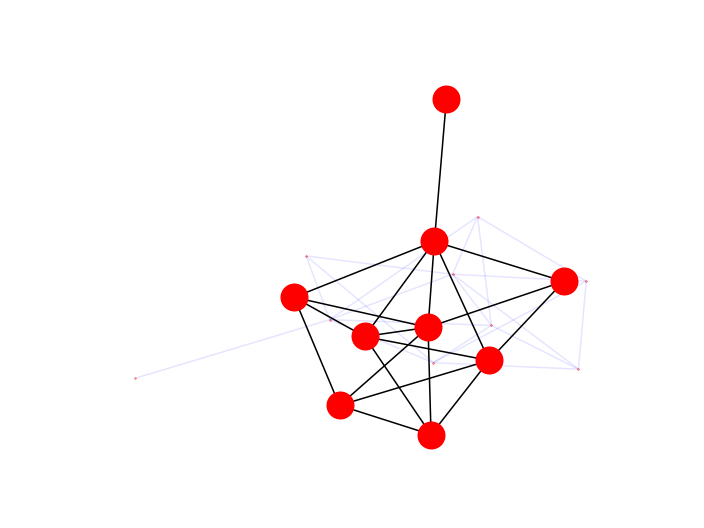

<IPython.core.display.Javascript object>


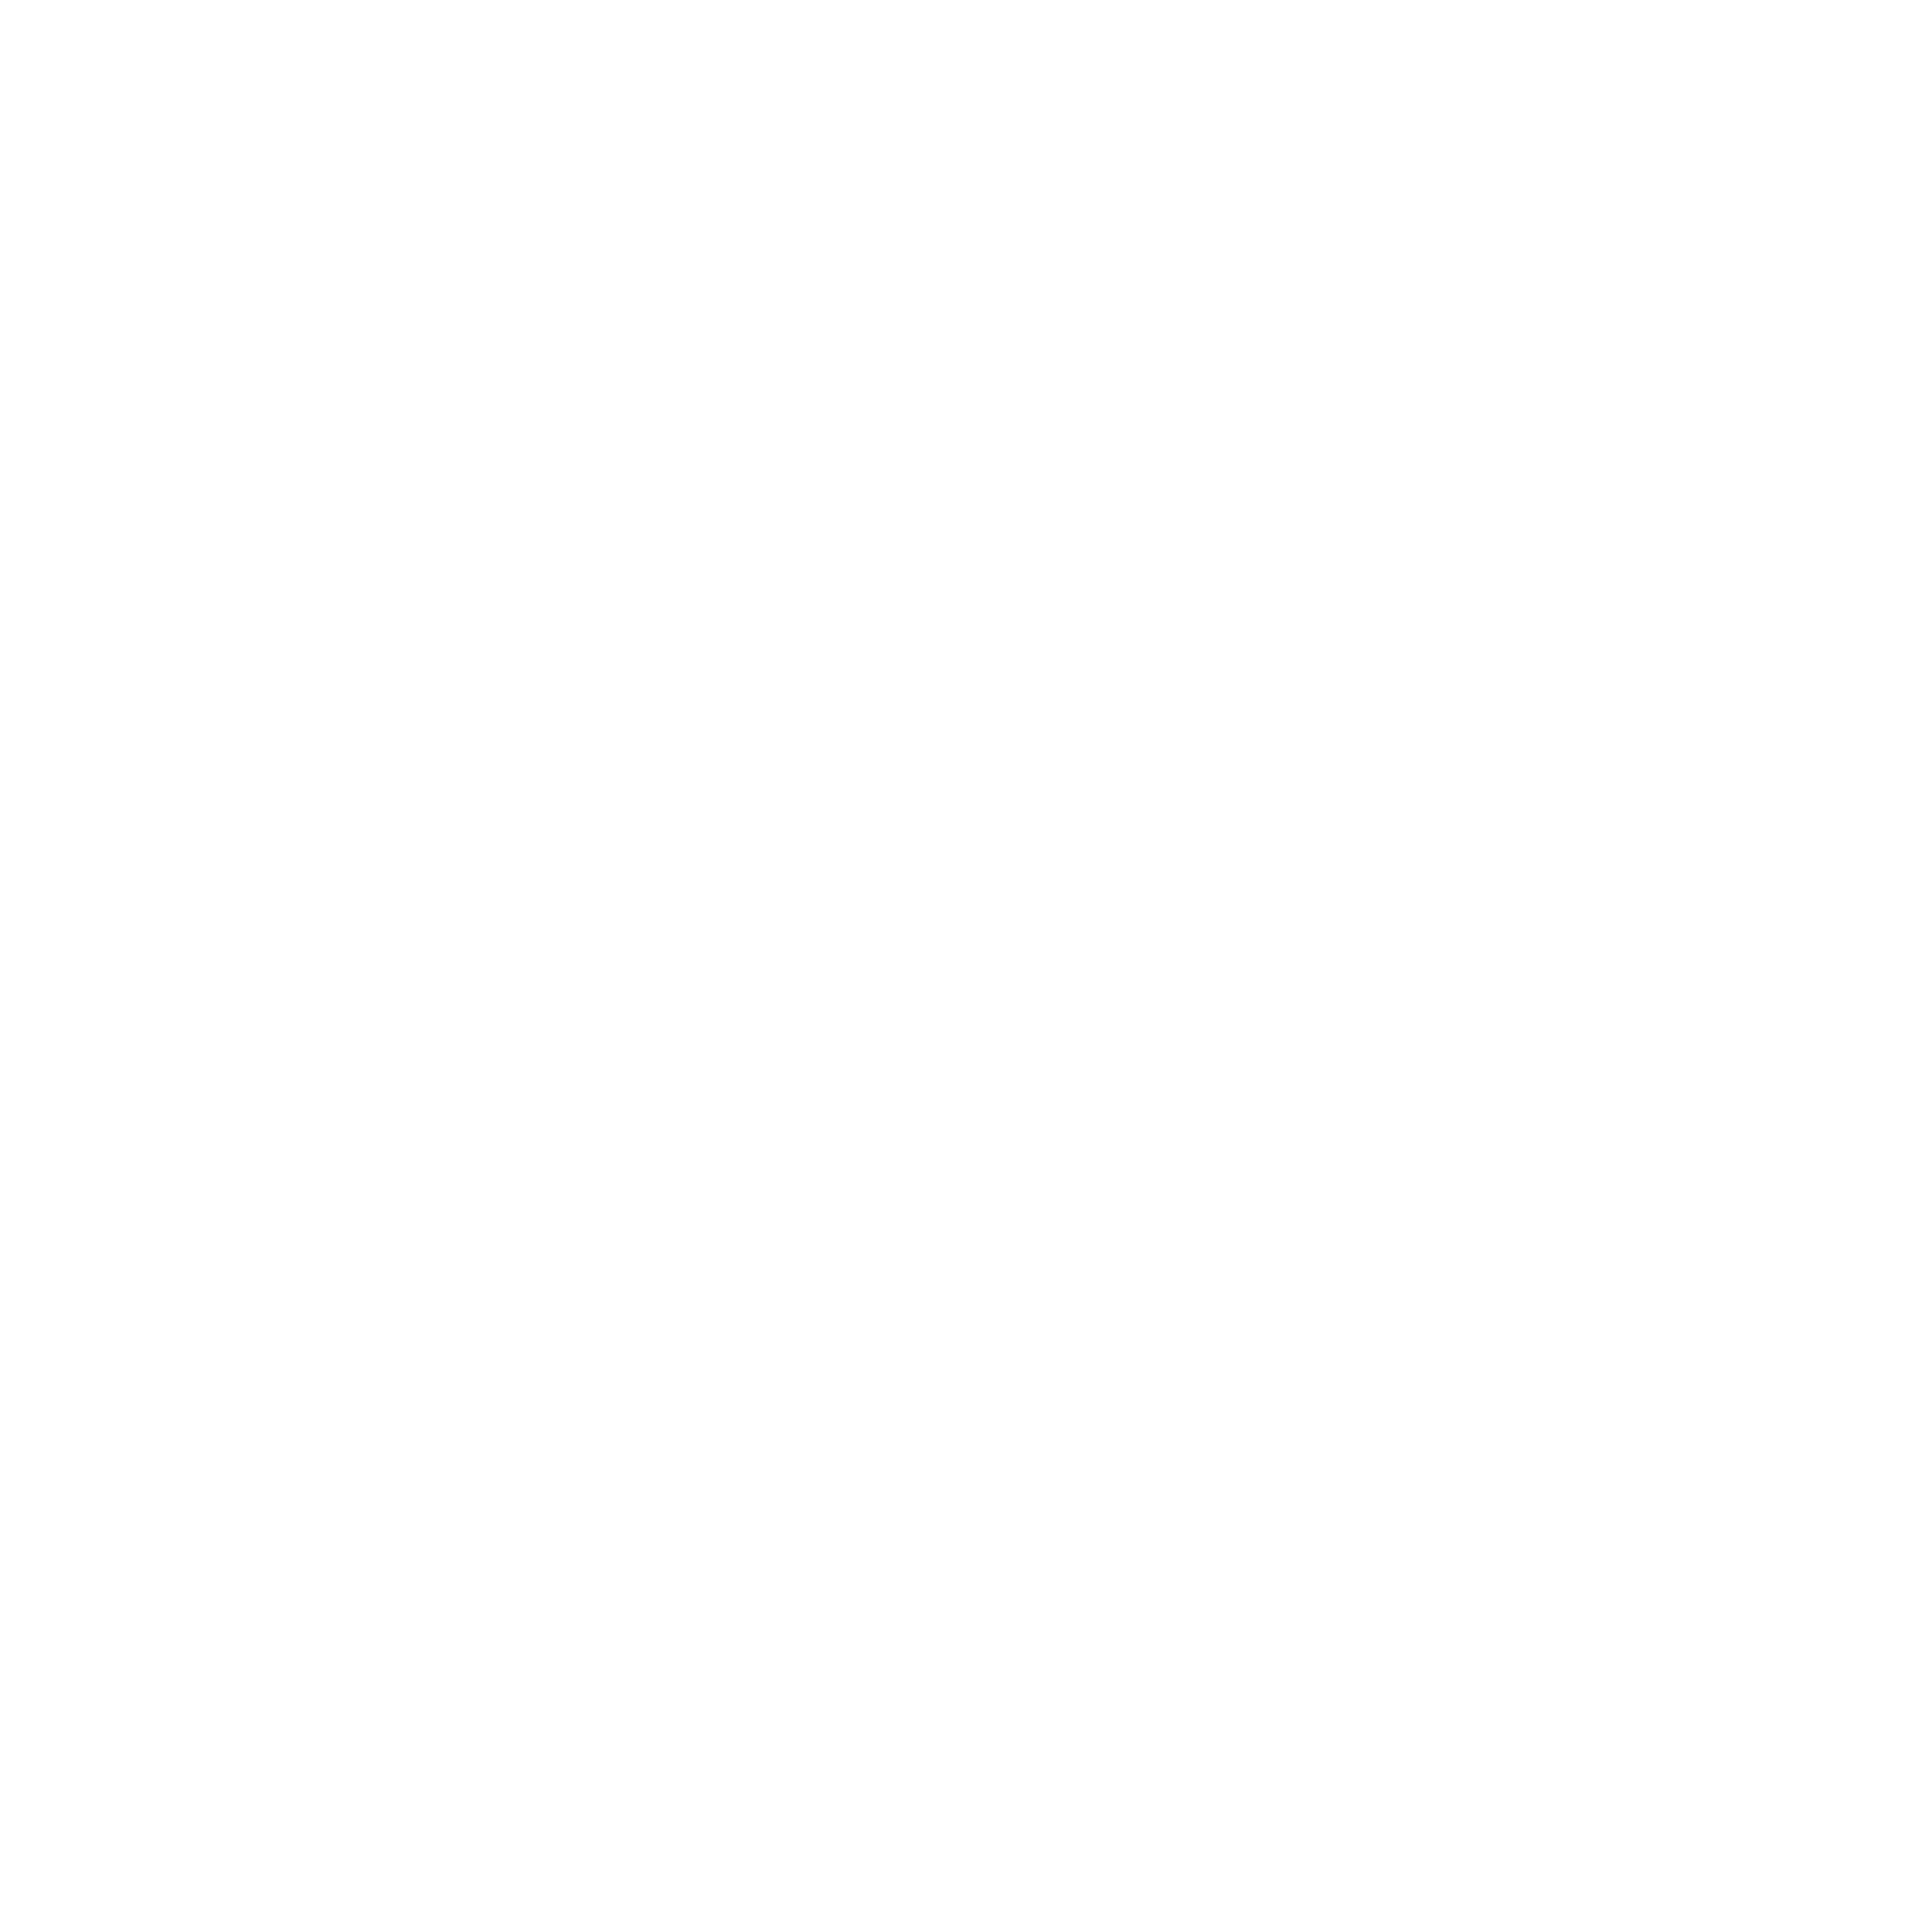

In [63]:
# Construction of network
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib notebook
G = nx.Graph()

def extractionActers(G,df):
#     acters = df[df['title']=='Avatar']['acter']
#     addEdgeForOneFilm(G,acters.tolist())
    for i in df.title.unique():
        acters = df.loc[df['title'] == i]
        addEdgeForOneFilm(G,acters['acter'].tolist())

def addEdgeForOneFilm(G, acters):
    for i,a in enumerate(acters):
        for j in range(i+1, len(acters)):
            #print("add edge for " + a + " at pos " + str(i) + " and " + acters[j] + " at pos " + str(j))
            if G.has_edge(a, acters[j]):
                G[a][acters[j]]['weight'] += 0.001
            else:
                G.add_edge(a, acters[j], weight=0.1)

            
# If u want to draw all the data, replace here testG => df
# But I tried to use all data, but it doesn't work at all.
extractionActers(G, testG)

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=0.1)

# edges
nx.draw_networkx_edges(G, pos, edges=G.edges(), alpha=0.1, edge_color='b')

labels = {}
for node in G.nodes():
    if len(G.edges(node)) > 60:
        labels[node] = node
# labels of points
nx.draw(G, with_labels=False)
nx.draw_networkx_labels(G, pos, labels, font_size=6, font_family='sans-serif')

plt.subplots(figsize=(40,40))
plt.axis('off')
plt.show()
plt.savefig("Graph_by_acters.png", format="PNG")